## Problem Statement

Understand the patterns in Expedia Data with relation to staging and interview process. What are the underlying insights for final stages that a candidate has cleared.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [59]:
df = pd.read_csv('cand_edu.csv', header = None, names=['JobApplicationKey', 'CandidateKey', 'Institution', 'Degree'])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842418 entries, 0 to 1842417
Data columns (total 4 columns):
JobApplicationKey    int64
CandidateKey         int64
Institution          object
Degree               object
dtypes: int64(2), object(2)
memory usage: 56.2+ MB


In [61]:
df.isnull().sum() / df.shape[0]

JobApplicationKey    0.000000
CandidateKey         0.000000
Institution          0.004990
Degree               0.094841
dtype: float64

Only Couple of Degree and Institution are missing which pose no big issues.

In [62]:
df.head()

JobApplicationKey  CandidateKey                   Institution  \
0             590652        178475  Mission San Jose High School   
1             979227        895705   Mary D Bradford High School   
2            1067430        981117           Suva Grammar School   
3             473947         69555      University of california   
4             452319        195074           Columbia University   

                        Degree  
0  Diploma of Higher Education  
1                      General  
2                          NaN  
3             Bachelor of Arts  
4            Master of Science

In [63]:
data = pd.read_csv('final-data.csv', header=None, names = ['JobApplicationKey', 'CandidateKey', 'ReqKey', 'SrcReferringType', 'WorkingDays',
                                                           'WorkExperience', 'CompanyName', 'City', 'StateProvince', 
'Country', 'EmploymentTypeDesired', 'ShiftPreference', 'RelocationPosibility', 'ReqKey', 'ReqTitle', 'WorkDurationType', 'GradeLevel',
'RequiredEducation', 'RequiredExperienceYears', 'Shift', 'ReqDescription', 'JobCodeTitle', 'JobCategory', 'CountryName', 'Req_City', 'Req_State', 'Req_Country'])

In [64]:
data.head()

JobApplicationKey  CandidateKey  ReqKey   SrcReferringType  WorkingDays  \
0            3376717       1313054   45138   Job Posting Site      19128.0   
1            3376717       1313054   45138   Job Posting Site     139730.0   
2            3249142       1313106   45260    Internal Worker        320.0   
3            3249142       1313106   45260    Internal Worker      30518.0   
4            3219327       1313168   46258  Employee Referral     250030.0   

                                      WorkExperience  \
0  "Support mentor develop 7 finance analysts ass...   
1  "Program management: Pricing preparation negot...   
2  "Assisting our tier 2 guest and vendors in res...   
3  "Providing world class service to our Total Re...   
4  "40 p.w.in behandeling nemen van aanvragen van...   

                  CompanyName  City  StateProvince  Country     ...      \
0                   Nordstrom   NaN            NaN      NaN     ...       
1                      Boeing   NaN            NaN      NaN     ...       
2                Expedia (US)   NaN            NaN      NaN     ...       
3  Caesars Entertainment Inc.   NaN            NaN      NaN     ...       
4                    Beroepen   NaN            NaN      NaN     ...       

  RequiredEducation RequiredExperienceYears  Shift  \
0               NaN                     NaN    NaN   
1               NaN                     NaN    NaN   
2               NaN                     NaN    NaN   
3               NaN                     NaN    NaN   
4               NaN                     NaN    NaN   

                                      ReqDescription  \
0  <p>The Accounting Product Management Team (PdM...   
1  <p>The Accounting Product Management Team (PdM...   
2  <p><b>Essential Functions:</b></p><ul><li>Must...   
3  <p><b>Essential Functions:</b></p><ul><li>Must...   
4  <p><span>Each year Egencia helps thousands of ...   

                  JobCodeTitle JobCategory               CountryName  \
0            Product Manager I    Standard  United States of America   
1            Product Manager I    Standard  United States of America   
2  Customer Service Rep Tier 3       Agent  United States of America   
3  Customer Service Rep Tier 3       Agent  United States of America   
4  Corporate Travel Consultant       Agent               Netherlands   

    Req_City   Req_State Req_Country  
0   Bellevue  Washington         USA  
1   Bellevue  Washington         USA  
2  Las Vegas      Nevada         USA  
3  Las Vegas      Nevada         USA  
4  Amsterdam         NaN         NLD  

[5 rows x 27 columns]

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113086 entries, 0 to 113085
Data columns (total 27 columns):
JobApplicationKey          113086 non-null int64
CandidateKey               113086 non-null int64
ReqKey                     113086 non-null int64
SrcReferringType           111998 non-null object
WorkingDays                92185 non-null float64
WorkExperience             113086 non-null object
CompanyName                112171 non-null object
City                       0 non-null float64
StateProvince              0 non-null float64
Country                    0 non-null float64
EmploymentTypeDesired      113086 non-null object
ShiftPreference            4 non-null object
RelocationPosibility       0 non-null float64
ReqKey.1                   113086 non-null int64
ReqTitle                   113086 non-null object
WorkDurationType           113086 non-null object
GradeLevel                 113086 non-null object
RequiredEducation          0 non-null float64
RequiredExperience

In [66]:
data.isnull().sum()

JobApplicationKey               0
CandidateKey                    0
ReqKey                          0
SrcReferringType             1088
WorkingDays                 20901
WorkExperience                  0
CompanyName                   915
City                       113086
StateProvince              113086
Country                    113086
EmploymentTypeDesired           0
ShiftPreference            113082
RelocationPosibility       113086
ReqKey.1                        0
ReqTitle                        0
WorkDurationType                0
GradeLevel                      0
RequiredEducation          113086
RequiredExperienceYears    113086
Shift                      113080
ReqDescription                  0
JobCodeTitle                    0
JobCategory                     0
CountryName                     0
Req_City                     7780
Req_State                   41045
Req_Country                     0
dtype: int64

Actual data has a lot of missing fields where some of the fields are 100% missing. Since, this experience data was collected from SQL server, we can substitute most of these values when we have access to Resume.

In [67]:
staging = pd.read_csv('staging.csv', header = None, names = ['JobApplicationKey', 'CandidateKey', 'ReqKey', 'total_rounds', 'rounds_cleared', 'score'])

In [68]:
staging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236733 entries, 0 to 6236732
Data columns (total 6 columns):
JobApplicationKey    int64
CandidateKey         int64
ReqKey               int64
total_rounds         int64
rounds_cleared       int64
score                float64
dtypes: float64(1), int64(5)
memory usage: 285.5 MB


In [69]:
staging.isnull().sum()

JobApplicationKey    0
CandidateKey         0
ReqKey               0
total_rounds         0
rounds_cleared       0
score                0
dtype: int64

In [70]:
staging.head()

JobApplicationKey  CandidateKey  ReqKey  total_rounds  rounds_cleared  \
0            4233654       2022707   57956             3               1   
1            4215608       2010927   59958             4               4   
2            4095929       2022560   53748             4               1   
3            4135048       2025008   56825             4               1   
4            4090377       2025008   56825             4               1   

   score  
0   0.25  
1   0.80  
2   0.20  
3   0.20  
4   0.20

In [71]:
print(data.shape)
data.drop_duplicates(inplace = True)
print(data.shape)

(113086, 27)
(112962, 27)


In [72]:
print(df.shape)
df.drop_duplicates(inplace = True)
print(df.shape)

(1842418, 4)
(1840476, 4)


In [73]:
print(staging.shape)
staging.drop_duplicates(inplace = True)
print(staging.shape)

(6236733, 6)
(3655870, 6)


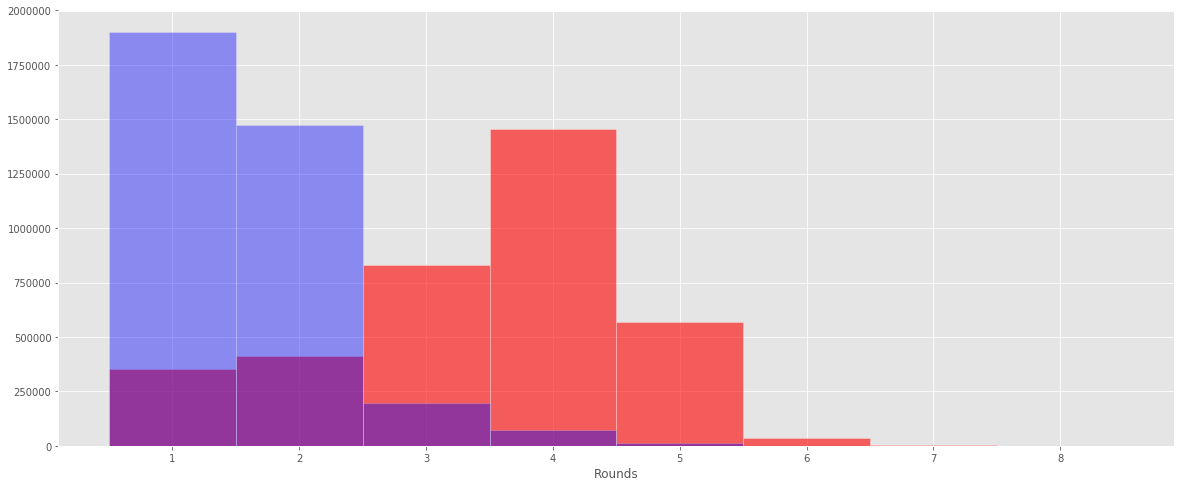

In [19]:
# What to analyze <- Histograms for total rounds, candidates applying in general [length], which company are famous, No.
# of words having some relationship with success, Major institutions of the students and are they having any reln with
# target, Look for relationship between time difference between required and already have experience of JD and 
# candidate respectively

bars1 = staging.total_rounds.value_counts(sort=False).values
bars2 = staging.rounds_cleared.value_counts(sort=False).values
 
# Heights of bars1 + bars2 (TO DO better)
bars = [(bars1[0] + bars2[0]) / (max(bars1) + max(bars2)),
       (bars1[1] + bars2[1]) / (max(bars1) + max(bars2)),
       (bars1[2] + bars2[2]) / (max(bars1) + max(bars2)),
       (bars1[3] + bars2[3]) / (max(bars1) + max(bars2)),
       (bars1[4] + bars2[4]) / (max(bars1) + max(bars2)),
       (bars1[5] + bars2[5]) / (max(bars1) + max(bars2)),
       (bars1[6] + bars2[6]) / (max(bars1) + max(bars2)),
       (bars1[7] + bars2[7]) / (max(bars1) + max(bars2))]
 
# The position of the bars on the x-axis
r = [1,2,3,4,5,6,7,8]
 
# Names of group and bar width
barWidth = 1
plt.figure(figsize = (20,8))
# Create brown bars
plt.bar(r, bars1, color='red', edgecolor='white', alpha = 0.6,  width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars, color='blue', edgecolor='white', alpha = 0.4, width=barWidth) 
# Custom X axis
plt.xlabel("Rounds")
 
# Show graphic
plt.show()


This bar graph gives us some understanding about the interview process in the Company. Mostly, the total rounds ranges between 1 to 8 with mean value of 4 while the rounds cleared by the candidate follows pareto distribution with highest value at 1.

In [74]:
temp = pd.DataFrame(data.groupby(['ReqKey', 'CandidateKey']).SrcReferringType.unique()).reset_index()

temp['SrcReferringType'] = temp.SrcReferringType.astype(str)
temp['SrcReferringType'] = temp.SrcReferringType.str.replace('[',"")
temp['SrcReferringType'] = temp['SrcReferringType'].str.replace(']', '')
temp2 = temp['SrcReferringType'].value_counts()


fig = {
    "data": [
        {
        "values": temp2.values,
        "labels": temp2.index,
        "domain": {"x": [0, .6]},
        "hole": .7,
        "type": "pie"
        },
    ],
    "layout": {
        "title": "Candidates Referring Type",
        "annotations": [
            {
                "font": {
                    "size": 25
                },
                "showarrow": False,
                "text": "Candidate%",
                "x": 0.17,
                "y": 0.5
            }
        ]
    }
}
iplot(fig, filename = 'donut')

This is a pretty clear indication that the internal workers are the preferrend candidates in the requisition process.

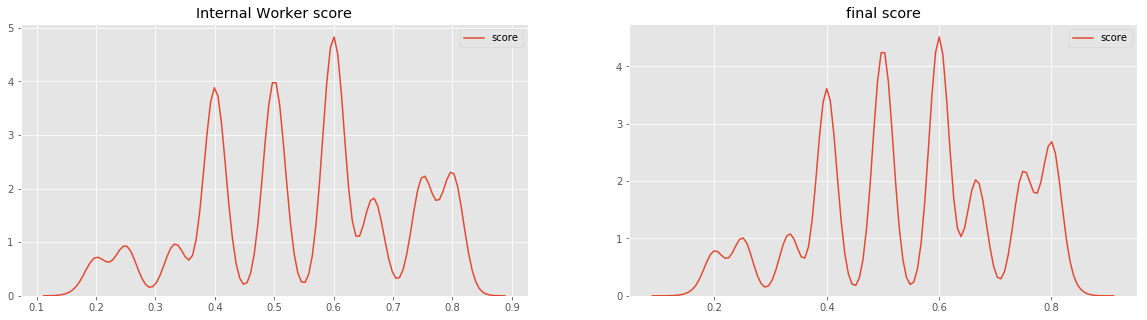

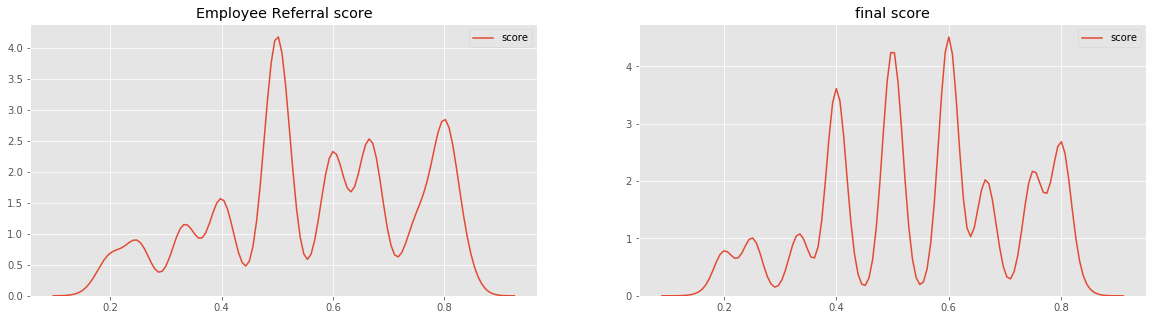

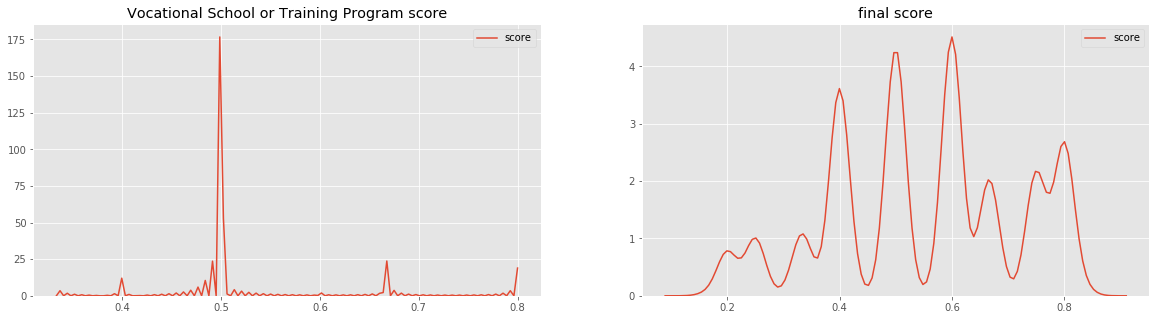

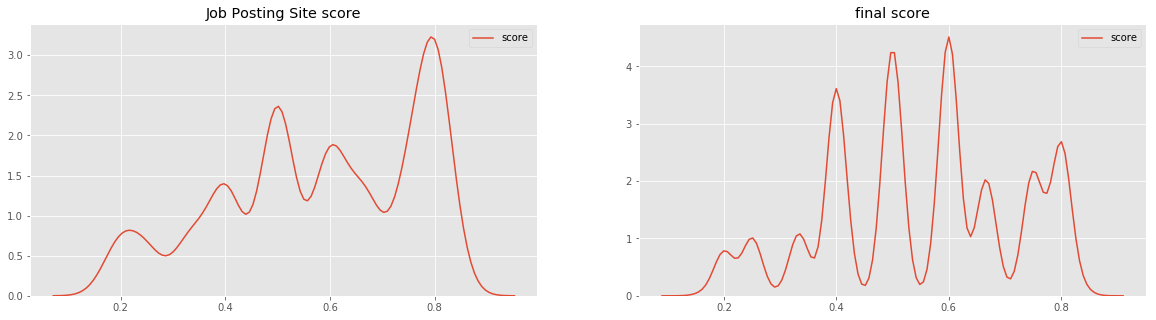

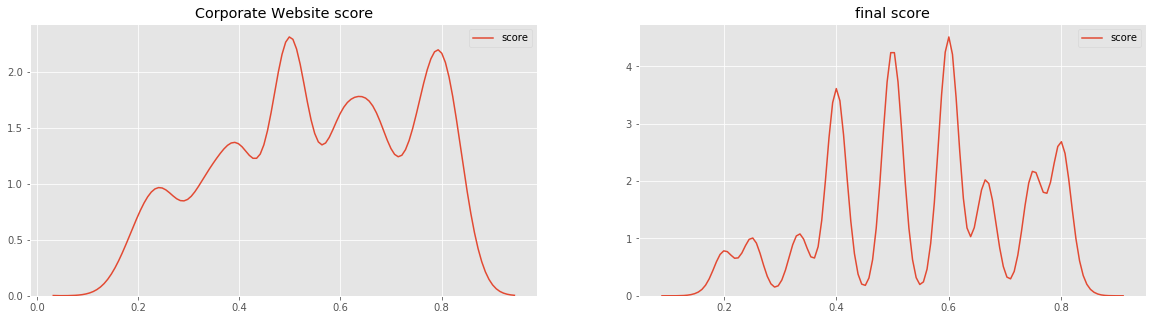

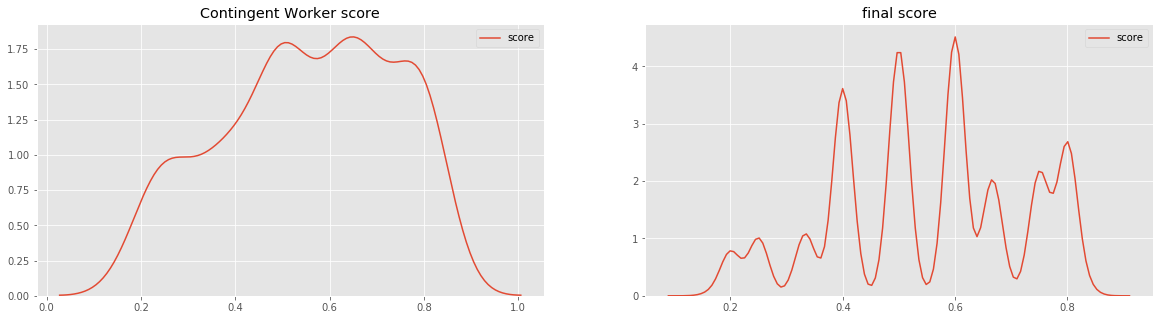

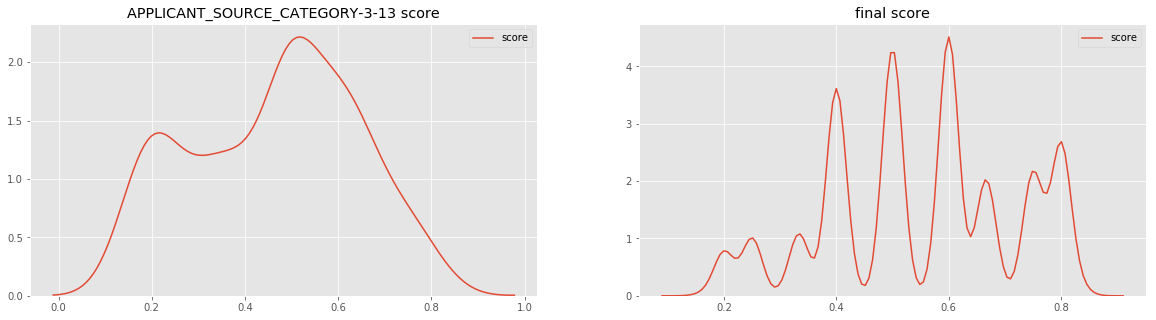

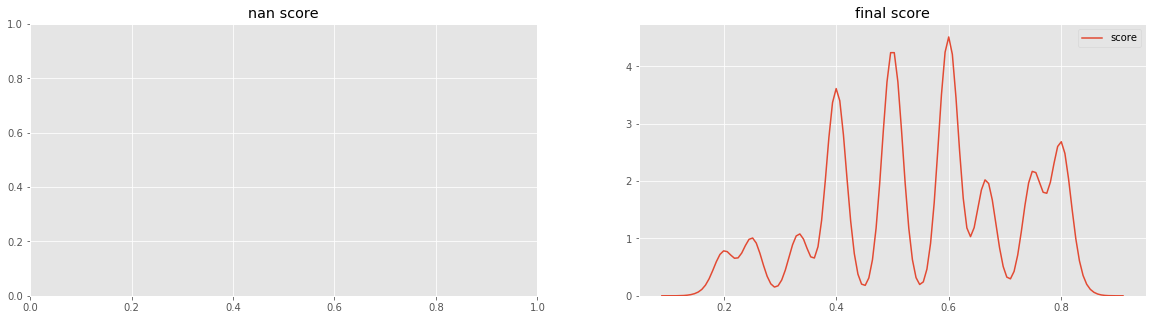

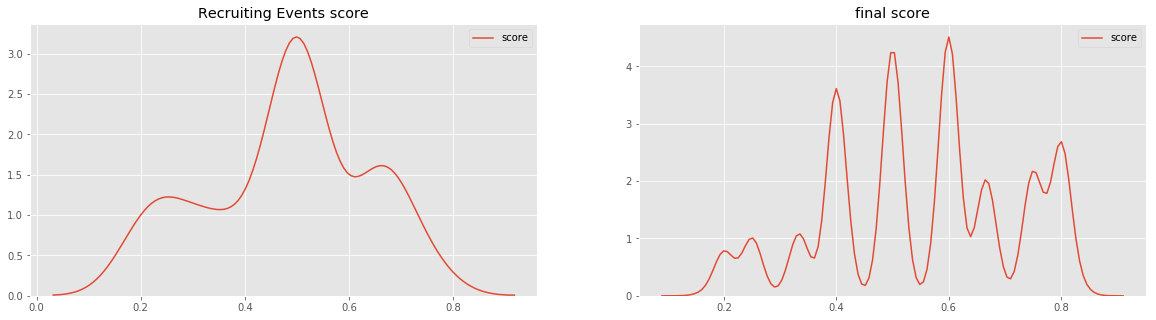

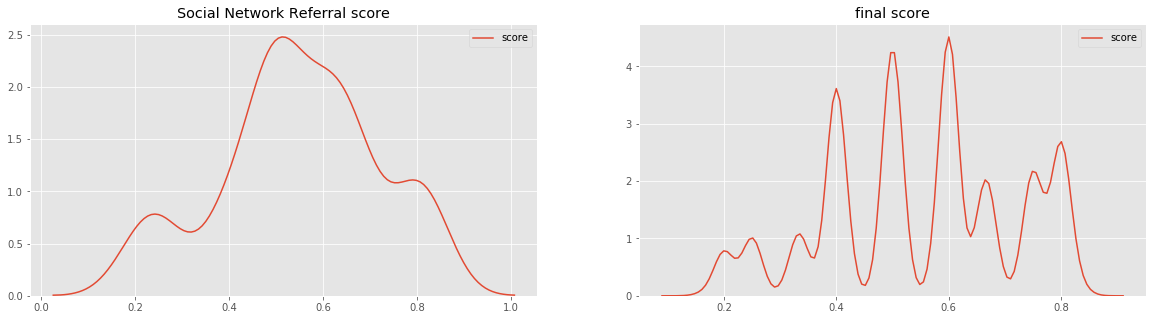

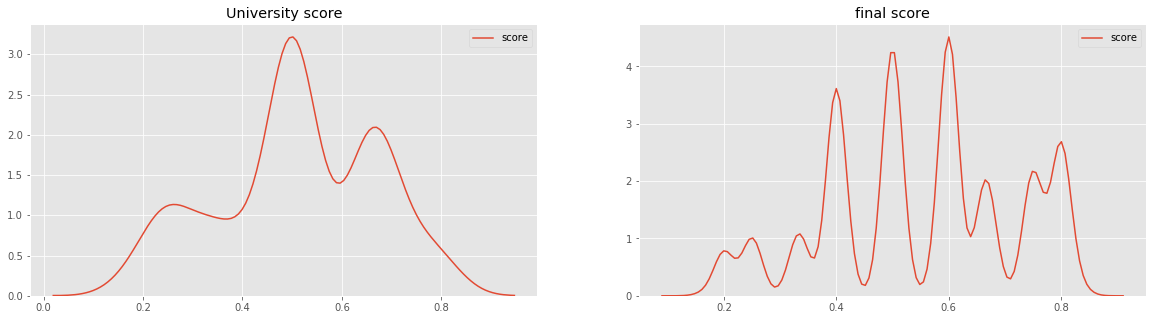

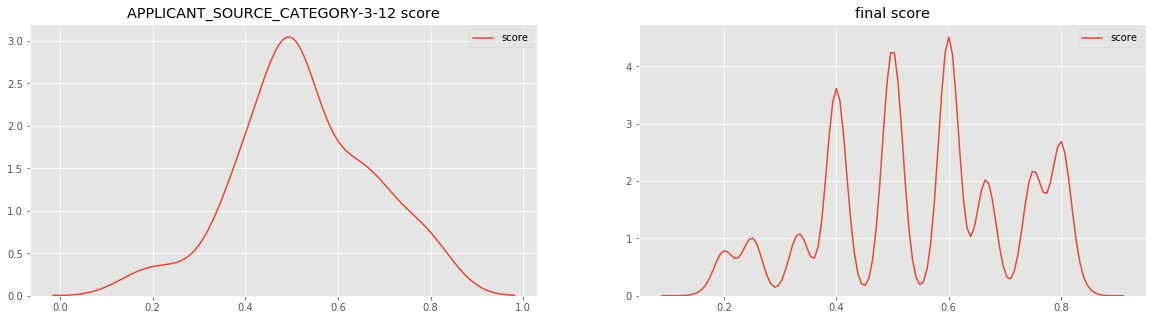

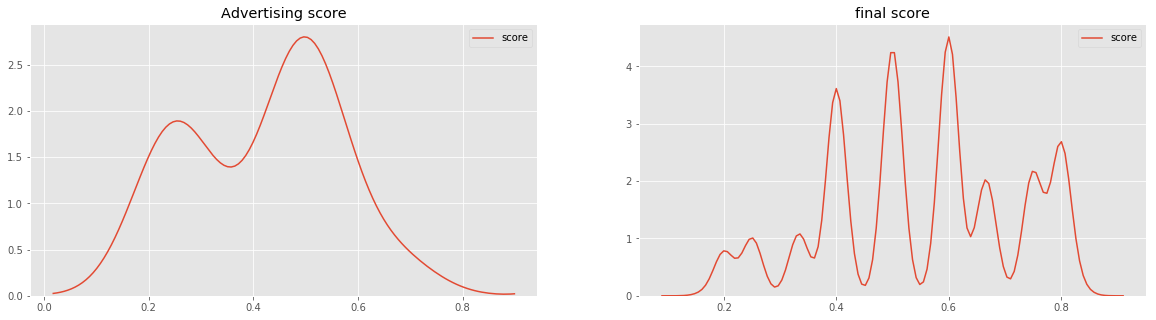

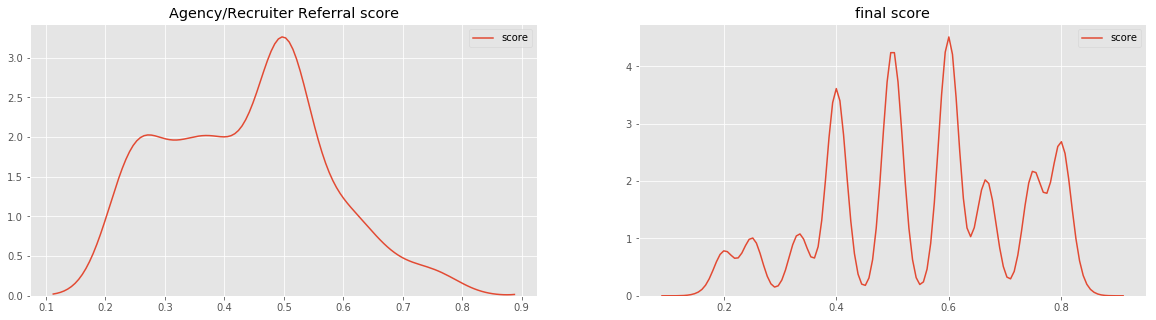

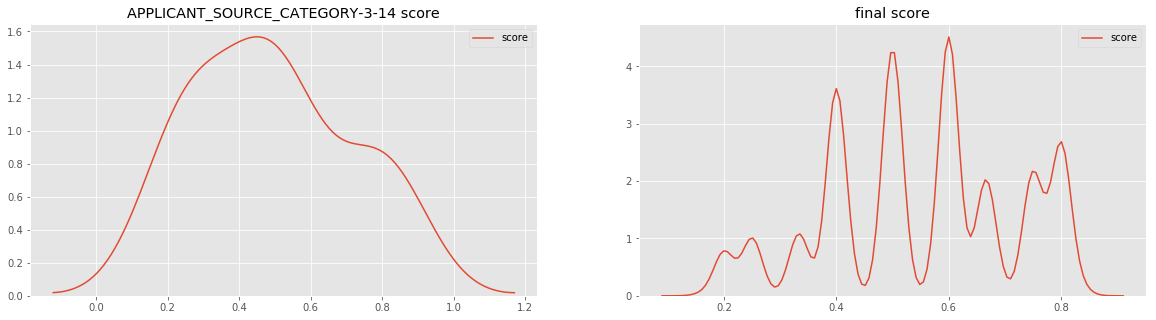

In [114]:
staging_final_data = data.merge(staging, on=['JobApplicationKey', 'CandidateKey', 'ReqKey'], how = 'inner')
for item in staging_final_data.SrcReferringType.unique():
    fig, ax = plt.subplots(1, 2, figsize = (20, 5))
    sns.kdeplot(staging_final_data[staging_final_data.SrcReferringType == item].score, ax = ax[0])
    ax[0].set_title(str(item) + ' score')
    sns.kdeplot(staging_final_data.score, ax = ax[1])
    ax[1].set_title('final score')
    plt.show()

Referrals are following exactly the same graph as final score. All the other candidates are showing quite a lot of variation considering the the staggering low number that's been considered.

In [39]:
edu_staging = df.merge(staging, on = ['JobApplicationKey', 'CandidateKey'], how = 'inner')

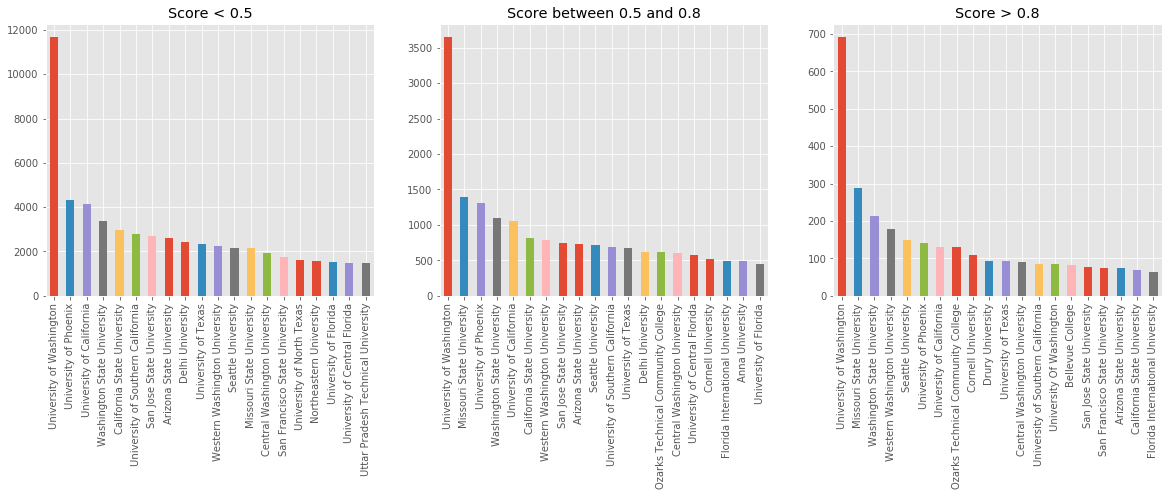

In [40]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
ax[0].set_title('Score < 0.5')
edu_staging[(edu_staging.score < 0.5)].Institution.value_counts()[:20].plot(kind = 'bar', ax = ax[0])
ax[1].set_title('Score between 0.5 and 0.8')
edu_staging[(edu_staging.score >= 0.5) & (edu_staging.score < 0.8)].Institution.value_counts()[:20].plot(kind = 'bar', ax = ax[1])
ax[2].set_title('Score > 0.8')
edu_staging[(edu_staging.score >= 0.8)].Institution.value_counts()[:20].plot(kind = 'bar', ax = ax[2])


Other important factor is the distance. As shown in the above graphs, the candidates clearing different stages of the interview process are belonging from the nearby locations and these graphs are not varying a lot. These employees are favored a bit over the distant candidates considering the cost of relocation.

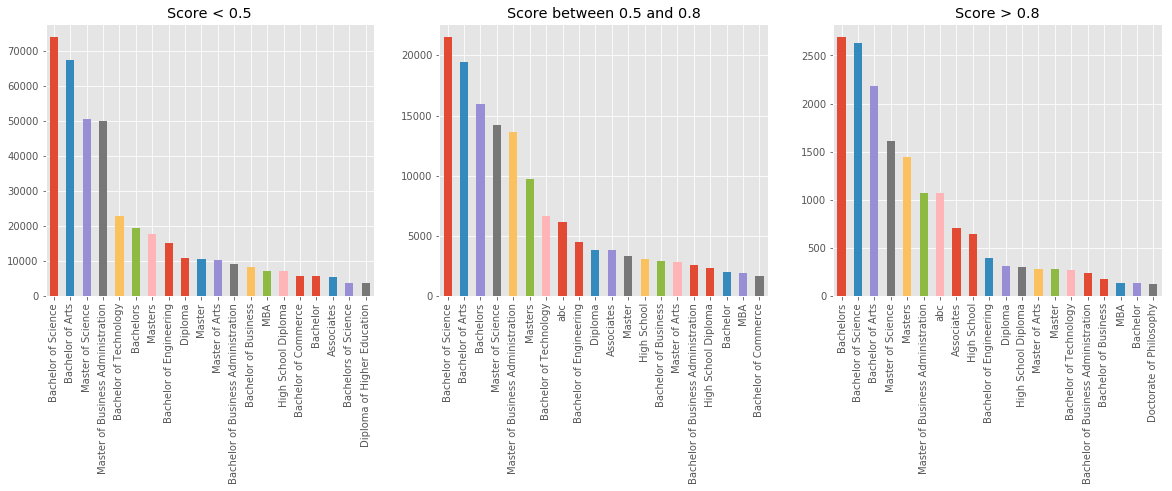

In [91]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
ax[0].set_title('Score < 0.5')
edu_staging[(edu_staging.score < 0.5)].Degree.value_counts()[:20].plot(kind = 'bar', ax = ax[0])
ax[1].set_title('Score between 0.5 and 0.8')
edu_staging[(edu_staging.score >= 0.5) & (edu_staging.score < 0.8)].Degree.value_counts()[:20].plot(kind = 'bar', ax = ax[1])
ax[2].set_title('Score > 0.8')
edu_staging[(edu_staging.score >= 0.8)].Degree.value_counts()[:20].plot(kind = 'bar', ax = ax[2])


This graph is following quite the same pattern as of above ones except one thing. Here, the bars are pretty close to one another which defines almost the same population with a consistent decreament. Also, as we go higher in the interview process, higher qualifications are preferred [for instance Ph.D] more compared to lower degrees.

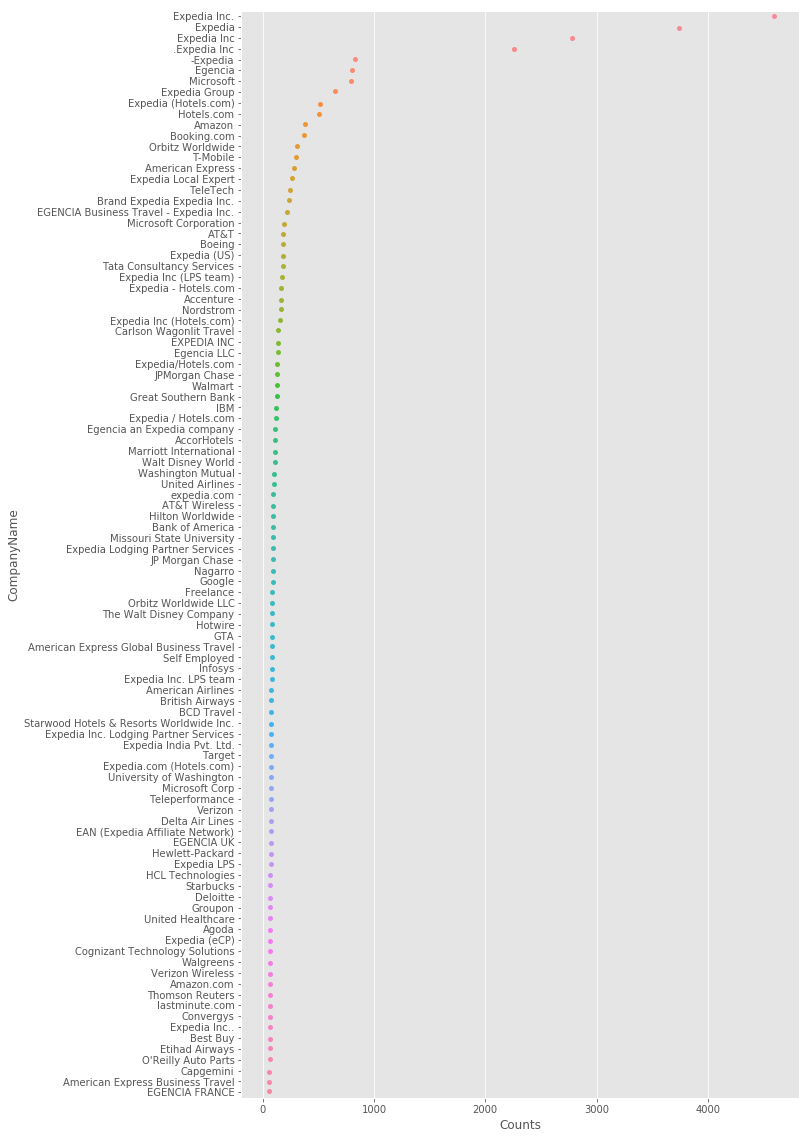

In [49]:
#sns.stripplot(x='JobCodeTitle', y = 'Age', data = df)
newdf = pd.DataFrame(data.CompanyName.value_counts()[:100]).reset_index()
newdf.columns = ['CompanyName', 'Counts']

plt.figure(figsize = (10, 20))
sns.stripplot(y='CompanyName', x = 'Counts', data = newdf)
plt.show()

As we have seen earlier that internal candidates are being favored quite a lot in the interview process. This is evident from the above graph as most of the candidates are either from Expedia or their subsidiaries.

In [50]:
def get_Merged_Exp(x):
    return len(' '.join(x).split())
newdf = data.groupby(['ReqKey', 'CandidateKey']).agg({'WorkExperience': list}).reset_index()
newdf['len_WorkExperience'] = newdf.WorkExperience.apply(lambda x: get_Merged_Exp(x))

In [51]:
newdf = newdf.merge(staging, on = ['ReqKey', 'CandidateKey'], how = 'inner')
newdf.head()

ReqKey  CandidateKey                                     WorkExperience  \
0   42545       1460378  ["Expedia Inc. is one of the worlds largest on...   
1   42561       1489829  ["Defining and charting the roadmap for the mo...   
2   42563       1331554  ["DOMAIN PORTFOLIOTravel (Expedia Vendor partn...   
3   42569       1356465  ["Marketing Operations Analytics Own day to da...   
4   42569       1402380  ["Analyzed international prisoner transfer cas...   

   len_WorkExperience  JobApplicationKey  total_rounds  rounds_cleared  \
0                  79            3345423             2               2   
1                  94            3189539             1               1   
2                 685            3373846             2               1   
3                 441            3171173             1               1   
4                 320            3190193             1               1   

      score  
0  0.666667  
1  0.500000  
2  0.333333  
3  0.500000  
4  0.500000

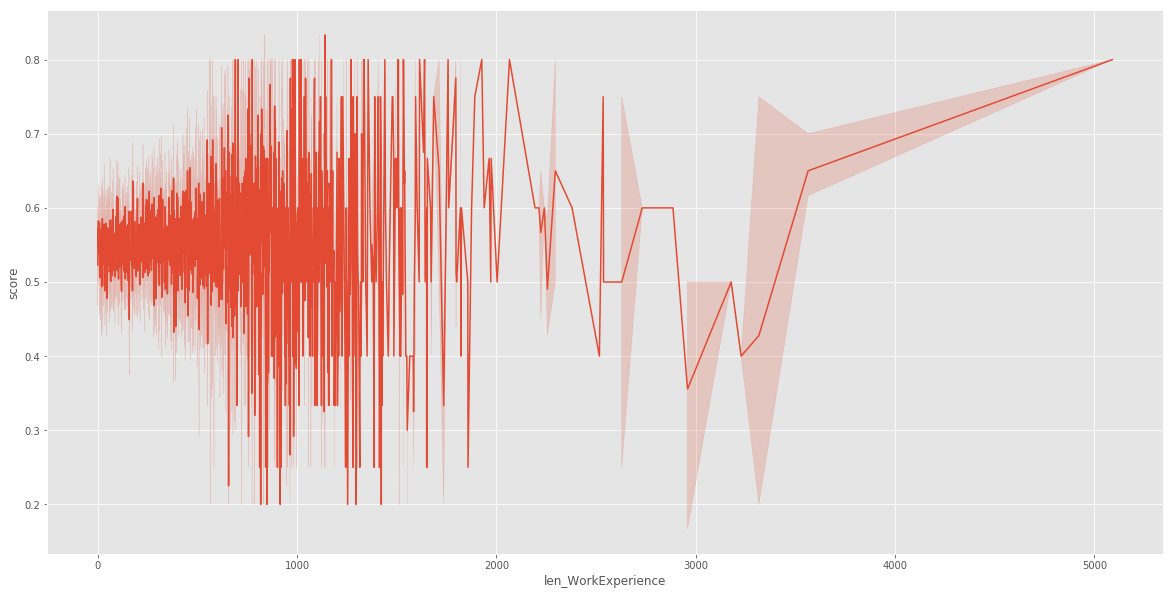

In [52]:
plt.figure(figsize = (20,10))
sns.lineplot(x='len_WorkExperience', y='score', data=newdf)

This is quite an information. Candidates with low word count in resume are being rejected. Any Guess? Well experience might be an issue where lower experience candidates are being favored less compared to higher experienced candidate. There are chances as well for the candidates to put random clutter or the recruiter couldn't evaluate the candidate properly with so less information. Let's validate this.

In [ ]:
hypo_valid = data.groupby(['ReqKey', 'CandidateKey']).agg({'WorkingDays': np.sum}).reset_index()
hypo_valid = hypo_valid.merge(staging, on = ['CandidateKey', 'ReqKey'], how = 'left')

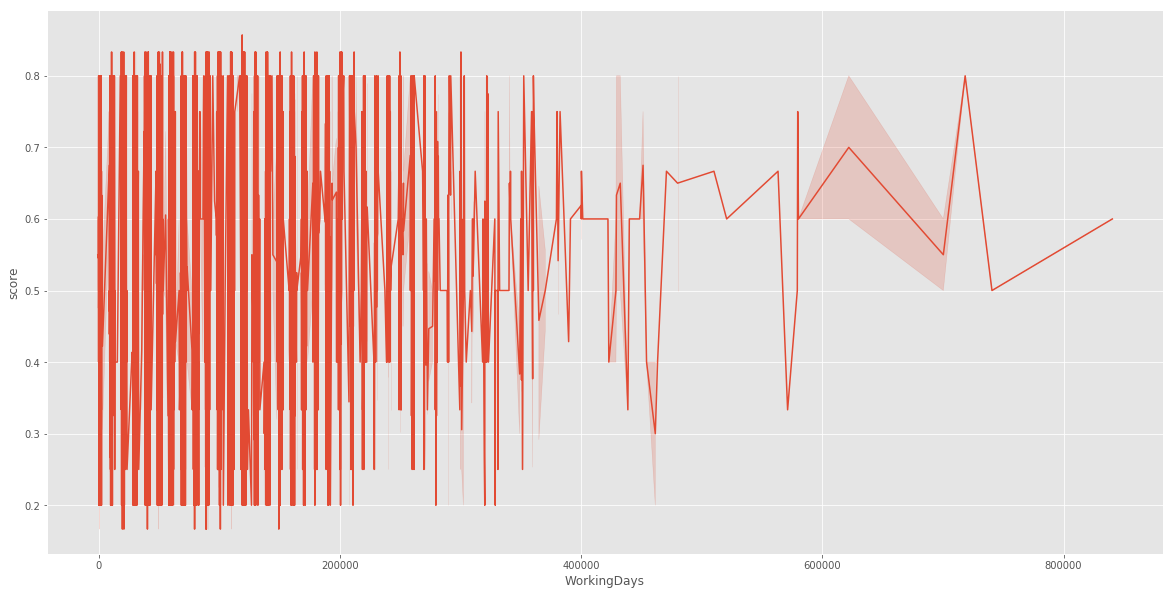

In [89]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'WorkingDays', y = 'score', data = hypo_valid)

So this makes the picture clear, candidates are given equal chances if they deserve in an interview process. Thus, we can take out the candidates with less informative resume or gibberish resume.

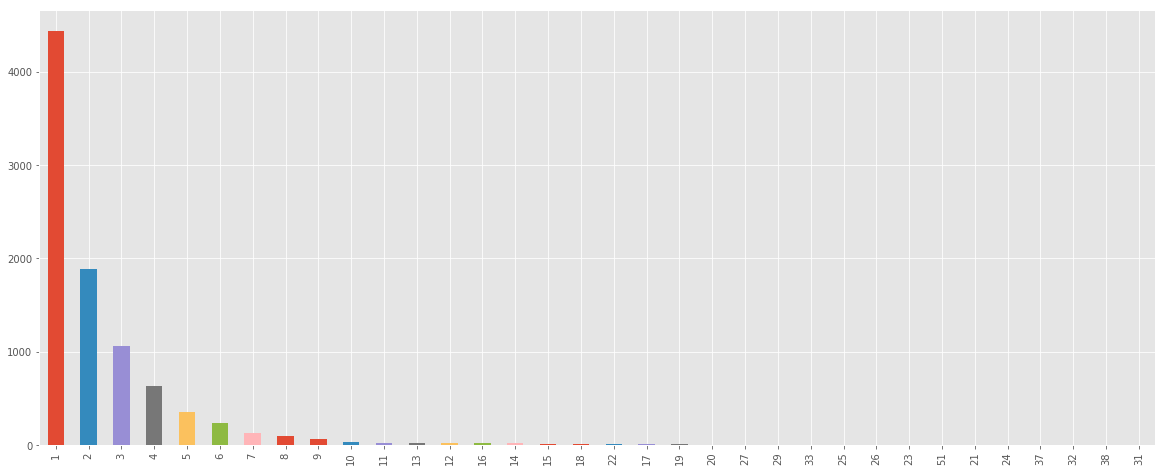

In [54]:
new_newdf = newdf.groupby('ReqKey')['CandidateKey'].count().reset_index()
plt.figure(figsize = (20,8))
new_newdf.CandidateKey.value_counts().plot(kind = 'bar')

In [75]:
temp = temp.merge(new_newdf, on = 'ReqKey', how = 'left')

In [78]:
temp = temp[temp.CandidateKey_y == 1].SrcReferringType.value_counts()

fig = {
    "data": [
        {
        "values": temp.values,
        "labels": temp.index,
        "domain": {"x": [0, .6]},
        "hole": .7,
        "type": "pie"
        },
    ],
    "layout": {
        "title": "Candidates Referring Type",
        "annotations": [
            {
                "font": {
                    "size": 25
                },
                "showarrow": False,
                "text": "Candidate%",
                "x": 0.17,
                "y": 0.5
            }
        ]
    }
}
iplot(fig, filename = 'donut')


Almost half of the requisitions are filled via internal candidates where only 1 candidate has applied.

Above theories has given some understanding to evaluate and starting of a new design. 

The design starts from conversion of Resume and JD into their vector representation using Average word embeddings in Tensorflow. The output is then used to evaluate similarity between the documents and feed into spark program along with other parameters.

<img src = 'Reco E Lifecycle.png'/>